# Лабораторна робота № 14 

**Тема.** Графодинамічний аналіз часових рядів

**Мета.** Навчитися використовувати елементи теорії графів для отримання спектральних і топологічних мір складності систем, що характеризуються часовими рядами.

## Теоретичні відомості

У попередній роботі ми ввели поняття мір складності для найпростіших графів та поширених мережних моделей, порівняли деякі з мір складності. В даній роботі ми продемонструємо сучасні методи перетворення часових рядів, що характеризують складні 
системи, у мережу з подальшим дослідженням відповідних спектральних і топологічних мір складності. Ми також покажемо, що вказані міри можна співставляти з динамікою вихідного часового ряду і якщо вони є інформативними щодо можливих змін власне ряду, то їх 
можливо використовувати для побудови індикаторів характерної динаміки складних систем.

Більшість складних систем інформують про свою структурну та динамічну природу, генеруючи послідовність певних характеристик, що можна представити часовими рядами. Останніми роками розроблено цікаві алгоритми перетворення часових рядів у мережу, що дозволяє розширити діапазон відомих характеристик часових рядів навіть до мережевих. Останнім часом було запропоновано декілька підходів до перетворення часових послідовностей у складні мережеподібні відображення. Ці методи можна умовно розділити на три класи [@DONNER2011]. Перший базується на вивченні "видимості" послідовних значень часового ряду і називається графом видимості (Visibility Graph, VG) [@DONNER2011;@vg_lacasa].

Другий аналізує взаємне наближення різних відрізків часової послідовності і використовує техніку рекурентного аналізу [@DONNER2011]. Рекурентна діаграма відображає існуючу повторюваність фазових траєкторій у вигляді бінарної матриці, елементами якої є одиниці або нулі, залежно від того, чи є близькими (рекурентними) із заданою точністю чи ні обрані точки фазового простору динамічної системи. Рекурентна діаграма легко трансформується в матрицю суміжності, за якою розраховуються спектральні та топологічні характеристики графу [@review_econophys].

Нарешті, якщо в основу формування зв'язків елементів графа покласти кореляційні відношення між ними, то отримаємо кореляційний граф [@DONNER2011]. Для побудови та аналізу властивостей кореляційного графа необхідно сформувати з кореляційної матриці матрицю суміжності. Для цього необхідно ввести величину, яка для кореляційного поля буде слугувати відстанню між корельованими агентами. Така відстань може бути представлена як $d_{ij}=\sqrt{2(1-C_{ij})}$, де $C_{ij}$ --- це коефіцієнт кореляції між двома активами. Так, якщо коефіцієнт кореляції між двома активами значний, то відстань між ними невелика, і, починаючи з певного критичного значення $d_{cr}$, активи можна вважати зв'язаними на графіку. Для матриці суміжності це означає, що вони є суміжними на графі. В іншому випадку активи не є суміжними. У цьому випадку умова зв'язності графа є обов'язковою умовою.

Основною метою таких методів є точне відтворення інформації, що зберігається в часових рядах, в альтернативній математичній структурі, щоб згодом можна було використовувати потужні інструменти теорії графів для характеристики часових рядів з іншої точки зору з метою подолання розриву між нелінійним аналізом часових рядів, динамічних систем і теорією графів.

У даній роботі розглянемо лише алгоритм графа видимості.

### Перетворення часових рядів у графи

Алгоритм класичного графа видимості був представлений у роботі [@vg_lacasa]. Для його використання спочатку треба взяти часовий ряд $Y(t)=\left\{ y_1, y_2,...,y_n \right\}$ довжини $n$. Кожну точку даних часового ряду можна розглядати як вершину асоціативної мережі, а ребро буде поєднувати дві вершини, якщо дві відповідні точки часового ряду можуть "бачити" одна одну (@fig-vg-hvg). Формально, два значення $y_a$ ряду (у момент часу $t_a$ ) та $y_b$ (у момент часу $t_b$) зв'язані, якщо для будь-якого іншого значення ($y_c, t_c$), яке знаходиться між ними ($t_a < t_c < t_b$), буде виконуватись наступна умова:

$$
y_c < y_a + (y_b - y_a)\frac{t_c - t_a}{t_b - t_a}. 
$$ {#eq-14-1}

Альтернативним (і набагато простішим) алгоритмом є горизонтальний граф видимості (Horizontal Visibility Graph, HVG) [@PhysRevE.80.046103], в якому можна встановити зв'язок між двома точками $y_a$ і $y_b$, якщо можна провести горизонтальну лінію в часовому ряді, що з'єднує їх, яка при цьому не перетинатиме жодне проміжне значення $y_c$, за наступним геометричним критерієм:

$$
y_c < \min{(y_a, y_b)}, \,\, \text{для} \,\, t_a < t_c < t_b. 
$$ {#eq-14-2}

::: {#fig-vg-hvg}

![](Images\lab_14\vg-hvg.png)

Ілюстрація побудови класичного графа видимості (червона лінія) та горизонтального графа видимості (зелена лінія) [@PhysRevE.94.052309] 

:::

### Пакет `ts2vg`

Для подальшої побудови класичного VG або його горизонтального аналогу, ми будемо використовувати бібліотеку [`ts2vg`](https://cbergillos.com/ts2vg/index.html#id3). Пакет `ts2vg` надає високопродуктивну реалізацію алгоритму для побудови графів видимості з даних часових рядів, вперше представленого Лукасом Лакасою та ін. у 2008 році [@vg_lacasa].

Графи видимості та деякі з їхніх властивостей (наприклад, степеневі розподіли) обчислюються швидко та ефективно навіть для часових рядів з мільйонами спостережень. Для обчислення графів використовується ефективний алгоритм "розділяй і володарюй", коли це можливо [@10.1063/1.4927835].

#### Встановлення

Остання випущена версія `ts2vg` доступна на [PyPI](https://pypi.org/project/ts2vg) і може бути легко встановлена шляхом запуску наступної команди:

In [ ]:
#| output: false

!pip install ts2vg

#### Підтримувані типи графів

##### Основні типи

- Класичний граф видимості [@vg_lacasa] (`ts2vg.NaturalVG`)
- Горизонтальний граф видимості [@PhysRevE.80.046103] (`ts2vg.HorizontalVG`)

##### Доступні варіації

- Зважений граф видимості (через параметр `weighted`)
- Направлений граф видимості (через параметр `directed`)
- Параметричний граф видимості [@BEZSUDNOV201453] (через параметри `min_weight` та `max_weight`)
- Граф обмеженої проникної видимості [@2012-3-030506;@10.1063/5.0048243] (через параметр `penetrable_limit`)

Зверніть увагу, що кілька варіантів графів можна комбінувати і використовувати одночасно. Із більш детальною документацією можна ознайомитись на сайті бібліотеки [`ts2vg`](https://carlosbergillos.github.io/ts2vg/). 

##### Сумісність з іншими бібліотеками

Отримані графи можуть бути легко перетворені в графові об'єкти з інших поширених графових бібліотек Python, таких як `igraph`, `NetworkX` та `SNAP`, для подальшого аналізу.

Для цього передбачені наступні методи:

- `as_igraph()`
- `as_network()`
- `as_snap()`

## Хід роботи

Спочатку імпортуємо необхідні модулі для подальшої роботи:

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import neurokit2 as nk
import yfinance as yf
import pandas as pd
import networkx as nx
import scienceplots

from sklearn import preprocessing
from tqdm import tqdm
from ts2vg import NaturalVG, HorizontalVG
from scipy.spatial import distance

%matplotlib inline

І виконаємо налаштування рисунків для виведення:

In [3]:
plt.style.use(['science', 'notebook', 'grid']) # стиль, що використовуватиметься
                                               # для виведення рисунків

params = {
    'figure.figsize': (8, 6),         # встановлюємо ширину та висоту рисунків за замовчуванням
    'font.size': 22,                  # розмір фонтів рисунку
    'lines.linewidth': 2,             # товщина ліній
    'axes.titlesize': 'small',        # розмір титулки над рисунком
    "font.family": "sans-serif",      # сімейство стилів підписів 
    "font.serif": ["Times"],          # стиль підпису
    'savefig.dpi': 300                # якість збережених зображень
}

plt.rcParams.update(params)           # оновлення стилю згідно налаштувань

Розглянемо можливість використання графодинамічний показників у якості індикаторів або індикаторів-передвісників кризових явищ. Для прикладу завантажимо часовий ряд криптовалютного індексу Біткоїна за весь часовий період, що надається веб-ресурсом `yfinance`:

In [4]:
symbol = 'BTC-USD'          # Символ індексу

data = yf.download(symbol)  # вивантажуємо дані
time_ser = data['Adj Close'].copy()     # зберігаємо саме ціни закриття
date_in_num = mdates.date2num(time_ser.index)

xlabel = 'time, days'    # підпис по вісі Ох 
ylabel = symbol          # підпис по вісі Оу

[*********************100%%**********************]  1 of 1 completed


::: {.callout-warning}
## Увага

Виконайте цей блок, якщо хочете зчитати дані не з Yahoo! Finance, а із власного файлу. Зрозуміло, що й аналіз результатів, і висновки залежать від того з яким рядом ми працюємо. 

:::

---

In [ ]:
symbol = 'sMpa11'                  # Символ індексу

path = "databases\sMpa11.txt"      # шлях по якому здійснюється зчитування файлу
data = pd.read_csv(path,           # зчитування даних 
                   names=[symbol])
time_ser = data[symbol].copy()     # копіюємо значення кривої 
                                   # "напруга-видовження" до окремої змінної

date_in_num = mdates.date2num(time_ser.index)

xlabel = r'$\varepsilon$'          # підпис по вісі Ох 
ylabel = symbol                    # підпис по вісі Оу

---

Виведемо досліджуваний ряд:

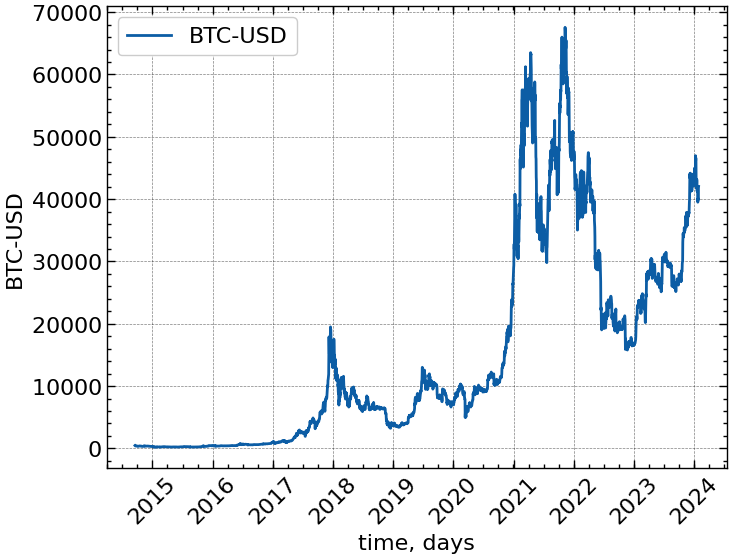

In [5]:
#| label: fig-dji-init 
#| fig-cap: "Динаміка щоденних змін індексу Біткоїна"

fig, ax = plt.subplots()                   # Створюємо порожній графік
ax.plot(time_ser.index, time_ser.values)   # Додаємо дані до графіку
ax.legend([symbol])                        # Додаємо легенду
ax.set_xlabel(xlabel)                      # Встановимо підпис по вісі Ох
ax.set_ylabel(ylabel)                      # Встановимо підпис по вісі Oy

plt.xticks(rotation=45)                    # оберт позначок по осі Ох на 45 градусів

plt.savefig(f'{symbol}.jpg')               # Зберігаємо графік 
plt.show();                                # Виводимо графік

Як і до цього, визначимо функцію для перетворення ряду (його стандартизації або знаходження прибутковостей). Для цього оголосимо функцію `transformation()`, що прийматиме на вхід часовий сигнал, тип ряду, і повертатиме його перетворення. Як показували попередні дослідження авторів, вихідне представлення часового ряду надає найбільш інформативне представлення для побудови графу. Тим не менш, ми допускаємо, що, наприклад, прибутковості фізичного сигналу можуть мати краще графове представлення, тому і визначаємо цю функцію в даній роботі. 

In [8]:
def transformation(signal, ret_type):

    for_graph = signal.copy()

    if ret_type == 1:       # Зважаючи на вид ряду, виконуємо
                            # необхідні перетворення
        pass
    elif ret_type == 2:
        for_graph = for_graph.diff()
    elif ret_type == 3:
        for_graph = for_graph.pct_change()
    elif ret_type == 4:
        for_graph = for_graph.pct_change()
        for_graph -= for_graph.mean()
        for_graph /= for_graph.std()
    elif ret_type == 5: 
        for_graph = for_graph.pct_change()
        for_graph -= for_graph.mean()
        for_graph /= for_graph.std()
        for_graph = for_graph.abs()
    elif ret_type == 6:
        for_graph -= for_graph.mean()
        for_graph /= for_graph.std()

    for_graph = for_graph.dropna().values

    return for_graph

Повертаємо той самий вихідний сигнал. 

Далі задаємо параметри досліджуваного графу. Для подальших розрахунків ми будемо використовувати одне й те саме значення часового вікна, кроку й типу ряду. 

In [11]:
signal = time_ser.copy()
ret_type = 1            # вид ряду: 1 - вихідний, 
                        # 2 - детрендований (різниця між теп. значенням та попереднім)
                        # 3 - прибутковості звичайні, 
                        # 4 - стандартизовані прибутковості, 
                        # 5 - абсолютні значення (волатильності)
                        # 6 - стандартизований ряд

for_graph = transformation(signal, ret_type) # перетворення сигналу

window = 250            # розмір вікна
tstep = 1               # крок вікна
graph_type = 'classic'  # тип графу: classic, horizontal

length = len(time_ser)

### Побудова графу

Оскільки побудова графу для всього часового ряду може зайняти досить великий проміжок часу, ми будемо будувати граф видимості лише для його фрагменту. Для цього визначимо параметри `index_begin` та `index_end`, які будуть вказувати на початок відліку побудови графу та кінець. Побудову проводимо для класичного графу видимості. 

In [24]:
index_begin = 1700
index_end = 2800

date = date_in_num[index_begin:index_end]

if graph_type == 'classic':
    g = NaturalVG(directed=None).build(for_graph[index_begin:index_end], xs=date)
    pos1 = g.node_positions()
    nxg = g.as_networkx()
if graph_type == 'horizontal':
    g = HorizontalVG(directed=None).build(for_graph[index_begin:index_end], xs=date)
    pos1 = g.node_positions()
    nxg = g.as_networkx()

graph_plot_options = {
    'with_labels': False,
    'node_size': 0,
    'node_color': [(0, 0, 0, 1)],
    'edge_color': [(0, 0, 0, 0.15)],
}

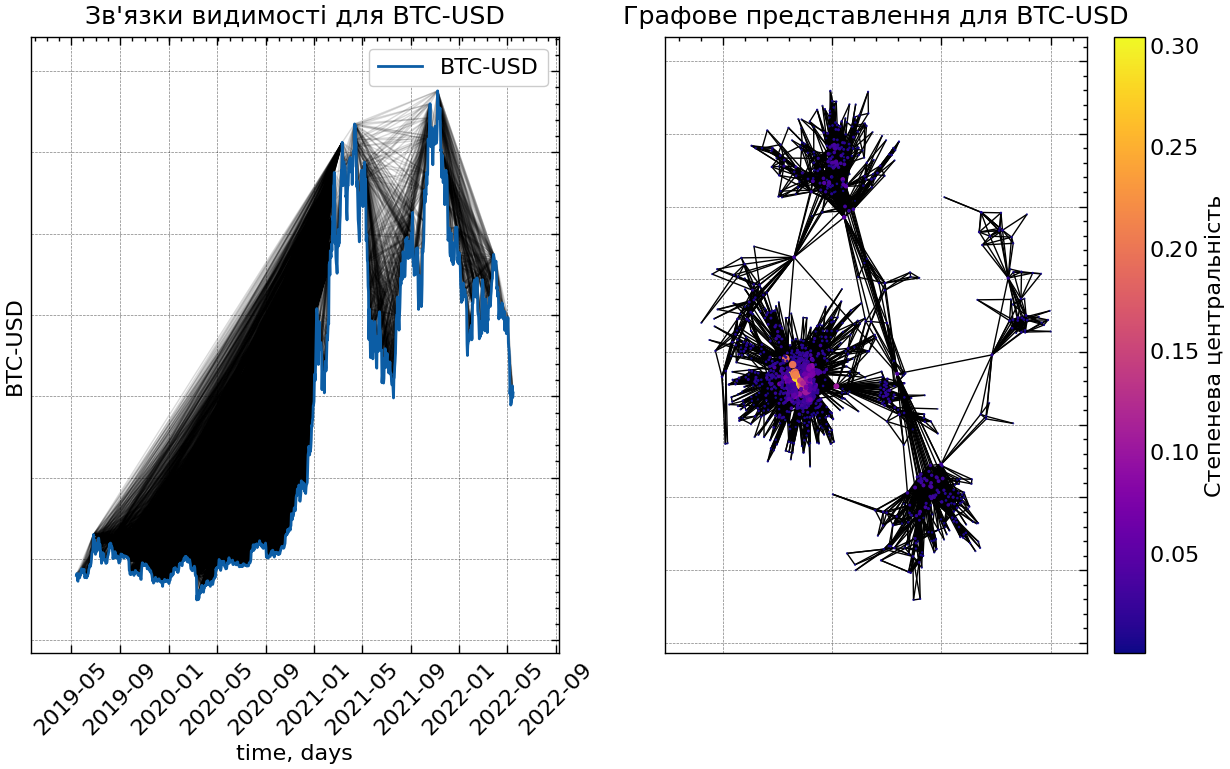

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

nx.draw_networkx(nxg, ax=ax[0], pos=pos1, **graph_plot_options)
ax[0].tick_params(bottom=True, labelbottom=True)
ax[0].plot(time_ser.index[index_begin:index_end], for_graph[index_begin:index_end], label=fr"{ylabel}")
ax[0].set_title(f'Зв\'язки видимості для {ylabel}', pad=10)
ax[0].set_xlabel(xlabel)
ax[0].set_ylabel(f"{ylabel}")
ax[0].legend(loc='upper right')
ax[0].tick_params(axis='x', labelrotation=45)


ax[1].set_title(f'Графове представлення для {symbol}', pad=10)

# визначаємо позицію вузлів на графі
pos2 = nx.spring_layout(nxg, k=0.15, iterations=100)

# розраховуємо степеневу центральність
degCent = nx.degree_centrality(nxg)

# створити список розмірів вершин на основі степеневої центральності
node_sizes = [v*100 for v in degCent.values()]

# кольори вузлів на основі їх степеневої центральності
node_colors = [v for v in degCent.values()]

# будуємо граф
nx.draw_networkx(nxg, ax=ax[1], pos=pos2,
                node_size=node_sizes,  
                node_color=node_colors,
                with_labels=False,
                cmap=plt.get_cmap('plasma'))

# присвоюємо мінімальне та максимальне значення 
# степеневої центральності для побудови теплової шкали
vmin = np.asarray(list(degCent.values())).min()
vmax = np.asarray(list(degCent.values())).max()

sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('plasma'), 
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
cb = plt.colorbar(sm, ax=ax[1])
cb.set_label('Степенева центральність')

plt.savefig(f"Time_ser_connections_symbol={symbol}_idx_beg={index_begin}_\
            idx_end={index_end}_sertype={ret_type}_network_type={graph_type}.jpg", bbox_inches="tight", dpi=1000)

Як ми можемо бачити з представленого рисунку, 3 послідовних зростання та спадів у 2021-2022 роках характеризуються доволі високим ступенем видимості в передкризовий період. Також дані піки утворюють орієнтовно 3 кластери із високою степеневою центральністю. Крахові події на криптовалютному ринку можна розглядати як графи переважного приєднання, де, можливо, ключову роль у цих підйомах та спадах можуть відігравати один або декілька "китів" ринку, котрі чинять найбільший вплив на ринок і спрямовують вектор уваги всіх трейдерів у тому чи іншому напрямі.  

### Віконна процедура

Далі будемо спостерігати за тим, як змінюються графові властивості мережі з плином часу. Для цього будемо використовувати добре знайому для нас процедуру рухомого вікна. У рамках цієї процедури дослідимо графодинаміку як спектральних, так і топологічних показників. 

Для побудови парної динаміки конкретного індикатора та досліджуваного ряду визначимо функцію `plot_pair`:

In [38]:
def plot_pair(x_values, 
              y1_values,
              y2_values,  
              y1_label, 
              y2_label,
              x_label, 
              file_name, clr="magenta"):

    fig, ax = plt.subplots()

    ax2 = ax.twinx()

    ax2.spines.right.set_position(("axes", 1.03))

    p1, = ax.plot(x_values, 
                  y1_values, 
                  "b-", label=fr"{y1_label}")
    p2, = ax2.plot(x_values,
                   y2_values, 
                   color=clr, 
                   label=y2_label)

    ax.set_xlabel(x_label)
    ax.set_ylabel(f"{y1_label}")

    ax.yaxis.label.set_color(p1.get_color())
    ax2.yaxis.label.set_color(p2.get_color())

    tkw = dict(size=2, width=1.5)

    ax.tick_params(axis='x', **tkw)
    ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
    ax2.tick_params(axis='y', colors=p2.get_color(), **tkw)


    ax2.legend(handles=[p1, p2])

    plt.savefig(file_name + ".jpg")
        
    plt.show();

#### Спектральні характеристики

Спектральна теорія графів базується на вивченні властивостей графів через власні значення або власні вектори матриці суміжності $A$ або матриці Лапласа $L$ [@Chung:1997].

Стандартна матриця Лапласа для графу $G$ визначається як

$$
L = D - A, 
$$ {#eq-14-3}

де $D$ --- діагональна матриця $G$, де $i$-ий діагональний елемент є степенем вершини $i$ в $G$ [@spec_graph_theory], а $A$ --- матриця суміжності $G$. У цій роботі ми представляємо спектральні характеристики для нормованої матриці Лапласа [@norm_lapl], яка визначається як

$$
\hat{L} = D^{-1/2}LD^{-1/2}. 
$$ {#eq-14-4}

Якщо $\lambda$ --- власне значення $\hat{L}$, тоді $\lambda \in [0, 2]$ [@Chung:1997]; тобто, нормалізуючи матрицю Лапласа, ми нормалізуємо власні значення. 

In [30]:
AlgebraicCon = []
GraphEnergy = []
SpecMoment_3 = []
SpecRadius = []
SpecGap = []
NaturalConnectivity = []

In [31]:
for i in tqdm(range(0,length-window,tstep)):
    # відбираємо фрагмент
    fragm = time_ser.iloc[i:i+window].copy()  

    # виконуємо процедуру трансформації ряду 
    fragm = transformation(fragm, ret_type)
    
    if graph_type == 'classic':
        g = NaturalVG(directed=None).build(fragm)
        pos = g.node_positions()
        nxg = g.as_networkx()
    if graph_type == 'horizontal':
        g = HorizontalVG(directed=None).build(fragm)
        pos = g.node_positions()
        nxg = g.as_networkx()
    
    # спектр власних значень матриці суміжності
    adj_spectrum = nx.adjacency_spectrum(nxg).real

    # сортуємо власні значення в порядку зростання
    sorted_adj_spectrum = np.sort(adj_spectrum)
    
    # розраховуємо алгебраїчну зв'язність
    alg_con = nx.algebraic_connectivity(nxg, normalized=True, method='tracemin_lu') 

    # розраховуємо енергію графа
    graph_en = np.sum(np.abs(adj_spectrum))

    # розраховуємо спектральний розрив
    spec_gap = sorted_adj_spectrum[-1] - sorted_adj_spectrum[-2]

    # розраховуємо спектральний радіус
    spec_rad = np.max(np.abs(adj_spectrum))

    # розраховуємо спектральний момент
    spec_mom_3 = np.mean(adj_spectrum ** 3)

    # розраховуємо природню зв'язність
    nat_con = np.log(np.mean(np.exp(adj_spectrum)))
    
    AlgebraicCon.append(alg_con)
    GraphEnergy.append(graph_en)
    SpecRadius.append(spec_rad)
    SpecGap.append(spec_gap)
    SpecMoment_3.append(spec_mom_3)
    NaturalConnectivity.append(nat_con)

100%|██████████| 3170/3170 [02:54<00:00, 18.21it/s]


Зберігаємо абсолютні значення у текстовому документі. Також готуємо мітки для рисунків та назви збережених:

In [40]:
ind_names = ['algebraic_conn', 'graph_energy', 'spectral_radius', 
             'spectral_grap', 'spectral_moment_3', 'natural_connectivity']

indicators = [AlgebraicCon, GraphEnergy, SpecRadius, 
              SpecGap, SpecMoment_3, NaturalConnectivity]

measure_labels = [r'$\lambda_2$', r'$E$', r'$R$', r'$\delta$', r'$m_3$', r'$N_c$']

file_names = []

for i in range(len(ind_names)):
    name = f"{ind_names[i]}_symbol={symbol}_wind={window}_step={tstep}_seriestype={ret_type}_graph_type={graph_type}"
    np.savetxt(name + ".txt", indicators[i])
    file_names.append(name)

##### Алгебраїчна зв'язність

Вивчаючи власні значення матриці Лапласа, однією з основних характеристик, яку ми можемо отримати, є **алгебраїчна зв'язність** $\lambda_2$ графа, яка відповідає другому найменшому власному значенню матриці Лапласа. Цей показник відображає кількість роз'єднаних компонент. Для розв'язного графа графа $\lambda_2$ буде дорівнювати нулю. Отже, з вищою щільністю зв'язків ми очікуємо, що $\lambda_2$ буде більшим. Використовуючи його, ми могли б сказати, наскільки відмовостійкою є досліджувана система і наскільки синхронізованими залишаються її вузли.

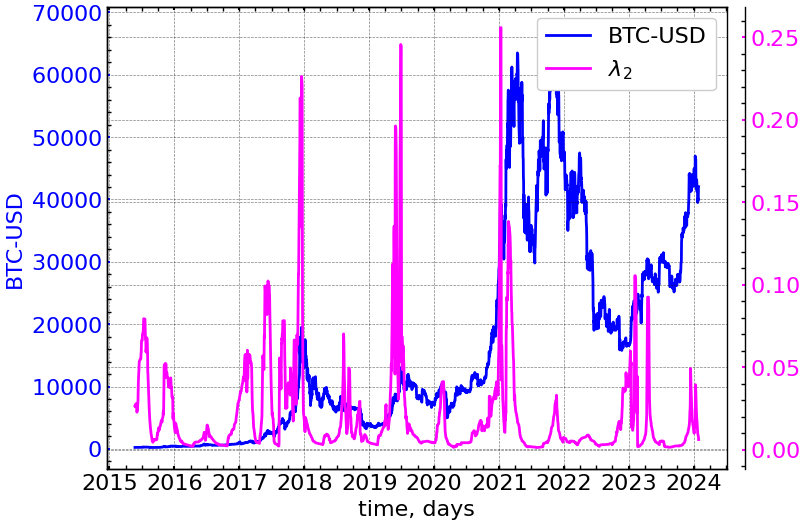

In [42]:
plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          indicators[0], 
          ylabel, 
          measure_labels[0],
          xlabel,
          file_names[0],
          clr="magenta")

##### Енергія графу

З власних значень матриці суміжності $A$ з $G$ можна визначити таку міру, як **енергія графу** $E(G)$ [@PhysRevE.85.016117;@gutman1978energy], яка обчислюється як

$$
E = E(G) = \sum_{i=1}^{N}\left| \lambda_i \right|.
$$ {#eq-14-5}

Подібно до $\lambda_2$, ми маємо повністю роз'єднаний граф, коли $E(G)=0$. Для кожного $\lambda_i > 0$ існує багато ребер $e_{ij}$, які визначають високу та ефективну зв'язність $G$.

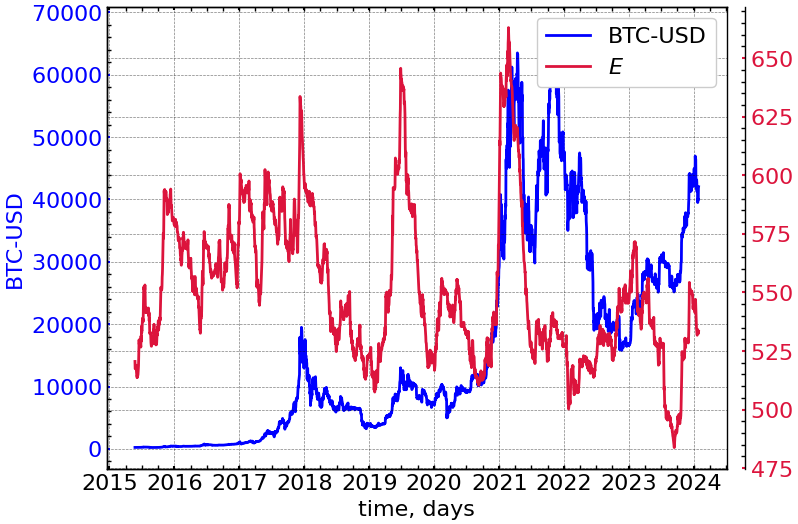

In [44]:
plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          indicators[1], 
          ylabel, 
          measure_labels[1],
          xlabel,
          file_names[1],
          clr="crimson")

##### Cпектральний радіус

Крім наведених вище мір, можна визначити такі міри, як **спектральний радіус**, яка є найбільшим абсолютним власним значенням матриці $A$:

$$
R = R(G) = \max_{1\leq i \leq N}\left| \lambda_i \right|. 
$$ {#eq-14-6}


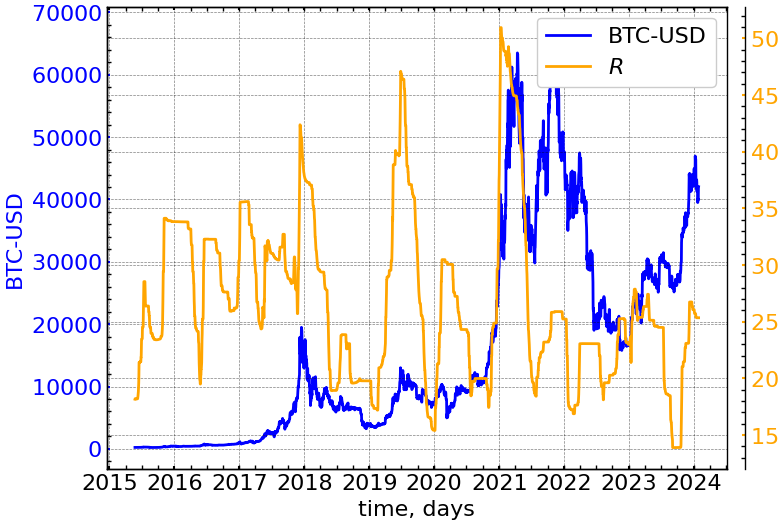

In [47]:
plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          indicators[2], 
          ylabel, 
          measure_labels[2],
          xlabel,
          file_names[2],
          clr="orange")

##### Cпектральний розрив

Проранжувавши власні значення матриці суміжності $G$ у неспадаючому порядку, тобто $\lambda_1 \leq \lambda_2 \leq ... \leq \lambda_n$, ми можемо визначити таку міру, як **спектральний розрив**:

$$
\delta = \delta(G) = \lambda_{n} - \lambda_{n-1}
$$ {#eq-14-7}

для якого $\lambda_n$ --- перше найбільше власне значення $\hat{L}$, а $\lambda_{n-1}$ друге найбільше власне значення. Спектральний розрив показує швидкість синхронізації в досліджуваній мережі. Чим він більший, тим більш взаємопов'язаними є вершини і тим складнішим є граф.

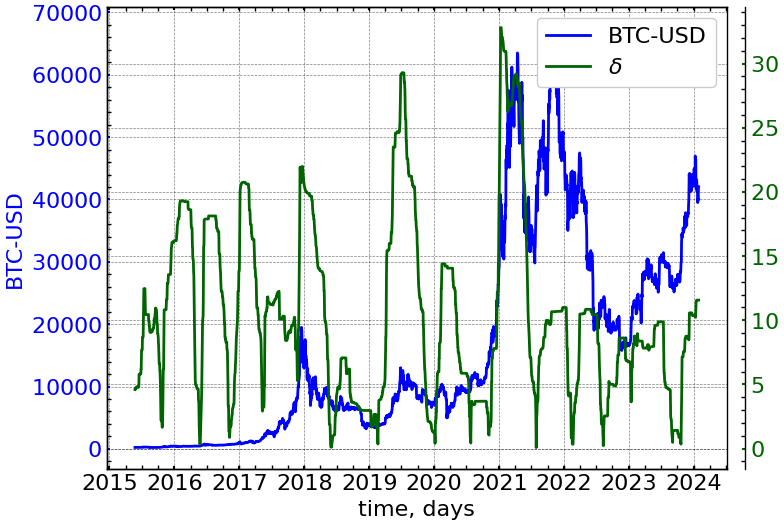

In [50]:
plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          indicators[3], 
          ylabel, 
          measure_labels[3],
          xlabel,
          file_names[3],
          clr="darkgreen")

##### Cпектральний момент

Спектральною мірою складності, яку ми також хотіли б представити є **$k$-й спектральний момент**. Для невід'ємного цілого числа $k$, $k$-й спектральний момент суміжності спектра суміжності визначається як

$$
m_k = m_k(G) = \sum_{i=1}^{N}\lambda_{i}^{k}, 
$$ {#eq-14-8}

де $m_k$ дорівнює кількості замкнутих обходів довжини $k$ [@cvetkovic1980spectra]. Кількість замкнутих обходів є важливим показником для вимірювання складності системи. Як було показано в роботі Ву та ін. [@5740372], використовуючи кількість замкнутих обходів всієї довжини, ми можемо виміряти складність графа та надлишковість альтернативних найкоротших шляхів. Отже, більші значення $m_k$ відповідають більшій складності мережі. Для подальших обчислень ми обрали $k=3$.

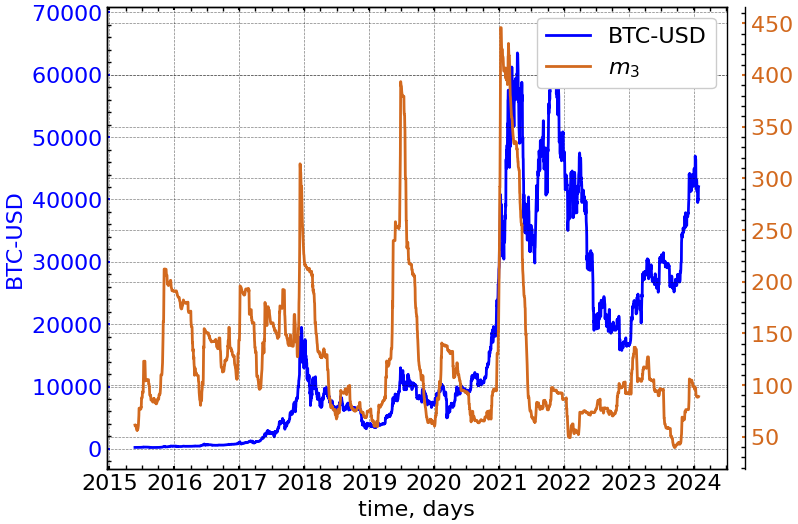

In [51]:
plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          indicators[4], 
          ylabel, 
          measure_labels[4],
          xlabel,
          file_names[4],
          clr="chocolate")

##### Cпектральна природна зв'язність

Юнь та ін. [@Wu_Jun_2010] запропонували вимірювати "середнє власне значення" спектра суміжності графа $G$. Було запропоновано називати цей показник **природною зв'язністю** або **природним власним значенням**:

$$
N_c = N_c(G) = \ln{\left( \frac{1}{N}\sum_{i=1}^{N}\exp{\lambda_i} \right)}.
$$ {#eq-14-9}

Естрада [@E_Estrada_2006], Ву та ін. [@5740372] показали, що (@eq-14-9) є чутливою та надійною мірою стійкості мережі.

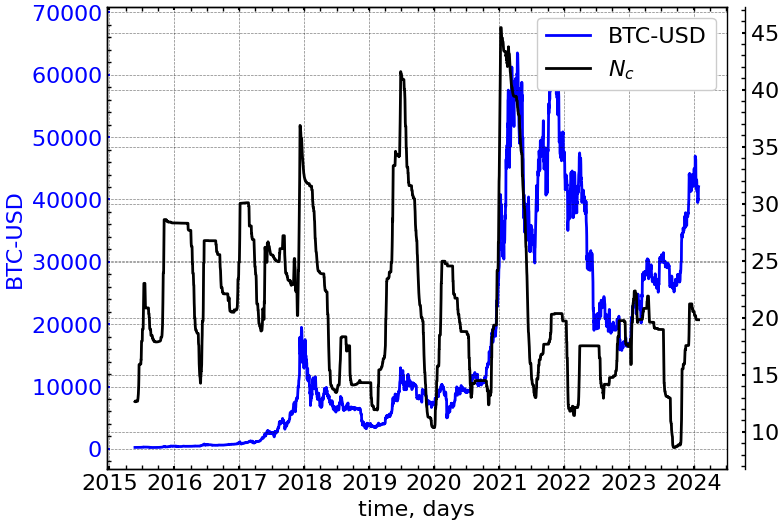

In [53]:
plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          indicators[5], 
          ylabel, 
          measure_labels[5],
          xlabel,
          file_names[5],
          clr="black")

#### Топологічні (Центральність, впливовість)

Існує багато способів кількісно оцінити важливість вершини або ребра з точки зору певного мережевого атрибуту, відображаючи таким чином топологію складної мережі.

In [56]:
DegreeMax = []
GlobalEigenvectorCentrality = []
GlobalClosenessCentrality = []
GlobalInformationCentrality = []
GlobalBetweennessCentrality = []
GlobalHarmonicCentrality = []

In [57]:
for i in tqdm(range(0,length-window,tstep)):
    # відбираємо фрагмент
    fragm = time_ser.iloc[i:i+window].copy()  

    # виконуємо процедуру трансформації ряду 
    fragm = transformation(fragm, ret_type)
    
    if graph_type == 'classic':
        g = NaturalVG(directed=None).build(fragm)
        pos = g.node_positions()
        nxg = g.as_networkx()
    if graph_type == 'horizontal':
        g = HorizontalVG(directed=None).build(fragm)
        pos = g.node_positions()
        nxg = g.as_networkx()
    
    # максимальний степінь вершини
    deg_max = max(dict(nxg.degree()).values())

    # середній ступінь впливовості
    glob_eigenvector_centrality = np.mean(list(nx.eigenvector_centrality_numpy(nxg).values()))

    # середній ступінь близькості
    glob_closeness_centrality = np.mean(list(nx.closeness_centrality(nxg).values()))

    # середній ступінь інформаційності
    glob_information_centrality = np.mean(list(nx.information_centrality(nxg).values()))

    # максимальний ступінь посередництва
    glob_betweenness_centrality = np.max(list(nx.betweenness_centrality(nxg).values()))

    # середній ступінь гармонійності
    glob_harm_centrality = np.mean(list(nx.harmonic_centrality(nxg).values()))

    DegreeMax.append(deg_max)
    GlobalEigenvectorCentrality.append(glob_eigenvector_centrality)
    GlobalClosenessCentrality.append(glob_closeness_centrality)
    GlobalInformationCentrality.append(glob_information_centrality)
    GlobalBetweennessCentrality.append(glob_betweenness_centrality)
    GlobalHarmonicCentrality.append(glob_harm_centrality)

100%|██████████| 3170/3170 [25:33<00:00,  2.07it/s]


Зберігаємо абсолютні значення у текстовому документі. Також готуємо мітки для рисунків та назви збережених:

In [68]:
ind_names = ['DegreeMax', 'GlobalEigenvectorCentrality', 'GlobalClosenessCentrality', 
             'GlobalInformationCentrality', 'GlobalBetweennessCentrality', 'GlobalHarmonicCentrality']

indicators = [DegreeMax, GlobalEigenvectorCentrality, GlobalClosenessCentrality, 
              GlobalInformationCentrality, GlobalBetweennessCentrality, GlobalHarmonicCentrality]

measure_labels = [r'$D_{max}$', r'$X$', r'$C$', r'$I$', r'$B$', r'$GHc$']

file_names = []

for i in range(len(ind_names)):
    name = f"{ind_names[i]}_symbol={symbol}_wind={window}_step={tstep}_seriestype={ret_type}_graph_type={graph_type}"
    np.savetxt(name + ".txt", indicators[i])
    file_names.append(name)

##### Максимальний ступінь вершини

**Ступінь** або **степенева центральність** є концептуально найпростішою метрикою для опису характеристик зв'язку однієї вершини в складній мережі. Вона може бути представлена у вигляді

$$
d_i = \sum_{j=1}^{N}A_{ij}
$$ {#eq-14-10}

де $d_i$ підраховує кількість $j$-их ребер, що інцидентні вершині $i$. 

Окрім ступеню конкретної вершини, ми можемо визначити вершину з найбільшою кількістю інцидентних ребер. Кількість таких вершин можемо позначити як $D_{max}$: 

$$
D_{max} = \max\left\{ d_i | i=1,...,N \right\}.
$$ {#eq-14-11}

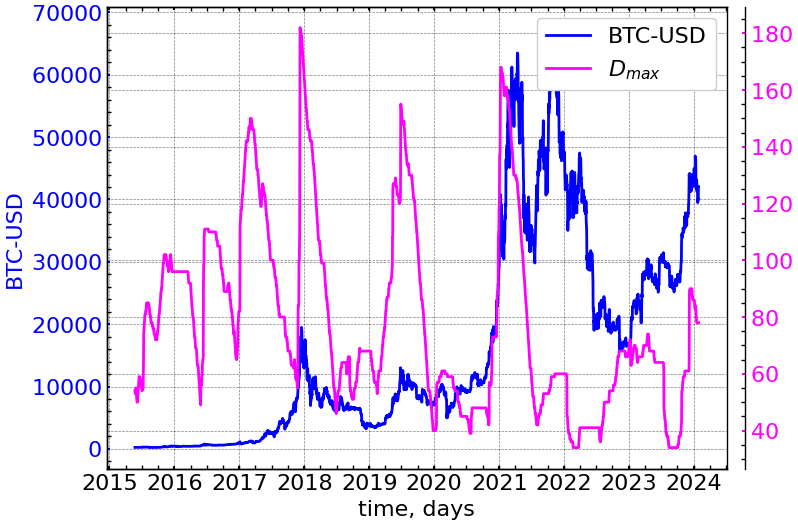

In [69]:
plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          indicators[0], 
          ylabel, 
          measure_labels[0],
          xlabel,
          file_names[0],
          clr="magenta")

##### Середній ступінь впливовості

Ступінь впливовості обчислює впливовість для вузла шляхом додавання впливовостей його сусідів. Впливовість для вузла $i$ --- це $i$-й елемент лівого власного вектора, пов'язаний з власним значенням $\lambda$ максимального модуля, який є додатним. Такий власний вектор $x$ визначається з точністю до мультиплікативної константи рівнянням

$$
\lambda x^{T} = x^{T}A,
$$ {#eq-14-12}

де $A$ --- матриця суміжності графа $G$. Наведене вище рівняння еквівалентне наступному:

$$
\lambda x_i = \sum_{j \to i}x_j.
$$ {#eq-14-13}

Тобто, додавання ступенів впливовості попередників вершини $i$ дає ступінь впливовості $i$, помножену на $\lambda$. У випадку неорієнтованих графів $x$ також розв'язує знайоме рівняння з правим власним вектором $Ax =\lambda x$.

За теоремою Перрона-Фробеніуса [@doi:10.1137/1.9781611971262], якщо $G$ сильно зв'язний, то існує єдиний власний вектор $x$, і всі його елементи строго додатні.

Якщо $G$ не є сильно зв'язним, то може існувати декілька лівих власних векторів, пов'язаних з $\lambda$, причому деякі з їх елементів можуть дорівнювати нулю.

::: {.callout-note}

Центральність за власним вектором було введено Ландау [@Schoenberg1969] для шахових турнірів. Пізніше його знову відкрив Вей [@wei1952algebraic], а потім популяризував Кендалл [@760e07d1-fd0d-3ce0-afae-f7ab9cd57766] в контексті спортивного рейтингу. Берге ввів загальне визначення для графів, заснованих на соціальних зв'язках [@berge1958]. Бонаcіч [@35397813-90c1-3806-8d5d-a07b3340ac3d] знову ввів центральність власного вектора і зробив її популярною в аналізі зв'язків.

Ця функція обчислює лівий домінуючий власний вектор, що відповідає додаванню впливовості попередників: це звичайний підхід. Щоб додати центральність наступників, спочатку переверніть граф за допомогою `G.reverse()`.

Ця реалізація використовує [SciPy sparse eigenvalue solver](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigs.html#scipy.sparse.linalg.eigs) (ARPACK) для пошуку найбільшої пари власне значення/власний вектор за допомогою ітерацій Арнольді [@wikipediaArnoldiIteration].

:::

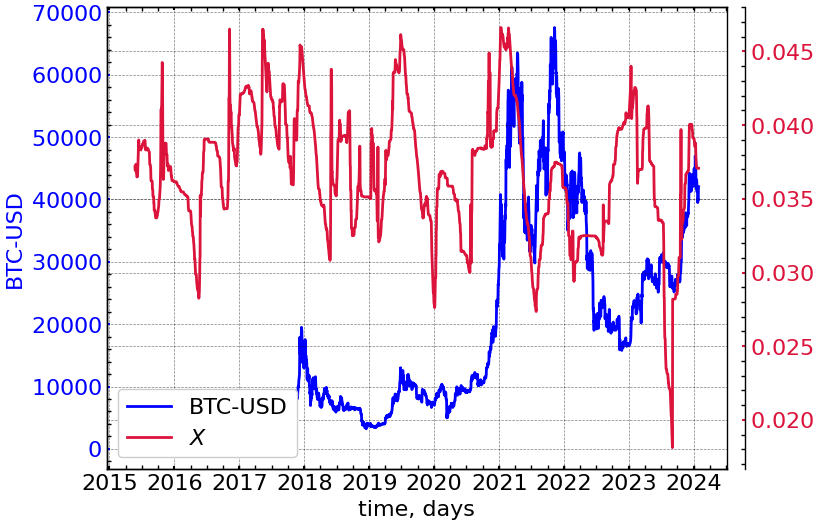

In [70]:
plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          indicators[1], 
          ylabel, 
          measure_labels[1],
          xlabel,
          file_names[1],
          clr="crimson")

##### Середній ступінь близькості

У мережі відстань $l_{ij}$ між вузлом $i$ та вузлом $j$ позначає кількість ребер, які з'єднують найкоротший шлях між цими двома вузлами. Спираючись на поняття довжини найкоротшого шляху між двома вузлами, ми можемо надати різні властивості, які характеризують зв'язність всієї мережі. Однією з таких мір є центральність або середній ступінь близькості зв'язку між вершиною $i$ та всіма іншими вершинами:

$$
c_i = \frac{N-1}{\sum_{j=1}^{N}l_{ij}}, 
$$ {#eq-14-14}

що надають зворотнє середнє по всім найкоротшим шляхам від $i$ до всіх вузлів $j$. 

Середнє арифметичне значення ступеню близькості для кожного $i$-го вузла дає нам глобальну **глобальний (середній) ступінь близькості**:

$$
C = \frac{1}{N}\sum_{i=1}^{N}c_i. 
$$ {#eq-14-15}


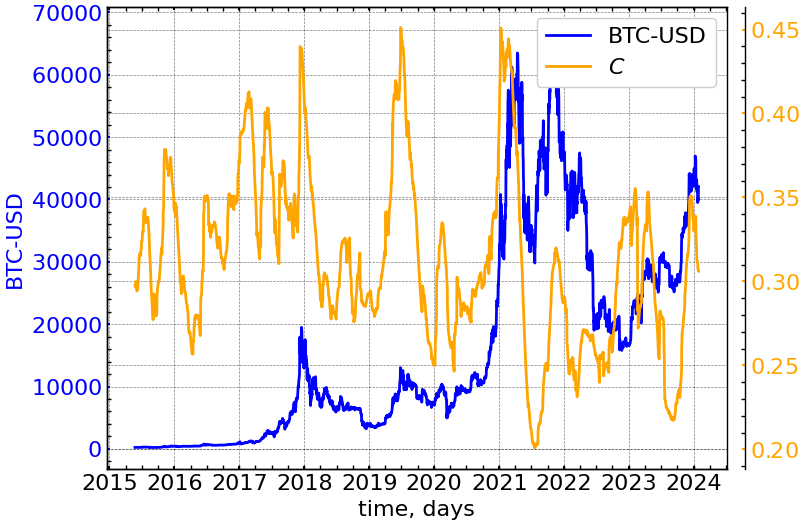

In [71]:
plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          indicators[2], 
          ylabel, 
          measure_labels[2],
          xlabel,
          file_names[2],
          clr="orange")

##### Середній ступінь інформаційності

Для визначення центральності будь-якого вузла $i$ пропонується спочатку визначити його інформаційну зв'язність з іншими вузлами, тобто $\left\{I_{ij} | j=1,..., N \right\}$. Середнє гармонійне значення інформації, що стосується шляху від вузла $i$ до інших вузлів, буде використовуватися для визначення **ступеню інформаційності** вузла $i$. Зокрема, якщо $I_i$ пов'язано з центральністю або інформаційністю вузла $i$, то

$$
\hat{I_i} = \left( \frac{1}{N}\sum_{j=1}^{N}\frac{1}{I_{ij}} \right)^{-1}.
$$ {#eq-14-16}

Згідно зі Стівенсоном та Зеленом [@STEPHENSON19891], ступінь інформаційності можна обчислити шляхом інвертування простої матриці. Перш за все, ми визначаємо $N \times N$ матрицю $B=\left\{{b_{ij}} \right\}$, де

$$
b_{ij} = \begin{cases}
        0 & \text{якщо} \,\, i \,\, та \,\, j \,\, суміжні,\\
        1 & \text{інакше},
    \end{cases}
$$ {#eq-14-17}

і $b_{ii}=1+d_i$, де $d_i$ ступінь вершини $i$. 

Далі, визначивши матрицю $C = \left\{ c_{ij} \right\} = B^{-1}$, ми можемо розрахувати $I_{ij}$ згідно рівняння нижче:

$$
I_{ij} = \frac{1}{c_{ii} + c_{jj} - 2c_{ij}}.
$$ {#eq-14-18}

Елемент $\sum_{j=1}^{N} 1/I_{ij}$ у рівнянні (@eq-14-16) можна переписати наступним чином: 

$$
\sum_{j=1}^{N}c_{ii} + c_{jj} - 2c_{ij} = Nc_{ii} + T - 2R, 
$$ {#eq-14-19}

де $T = \sum_{j=1}^{N}c_{jj}$ і $R = \sum_{j=1}^{N}c_{ij}$. 

Отже, ступінь інформаційності вузла $i$ може бути представлений як 

$$
I_i = \left[ \frac{1}{N}(Nc_{ii} + T - 2R) \right]^{-1} = \left[ c_{ii} + \frac{T-2R}{N} \right]^{-1}.
$$ {#eq-14-20}

Схожим чином, для вимірювання глобального ступеню інформаційності ми розглядаємо середнє арифметичне локального ступеню інформаційності:

$$
\hat{I} = \frac{1}{N}\sum_{i=1}^{N}I_i.
$$ {#eq-14-21}

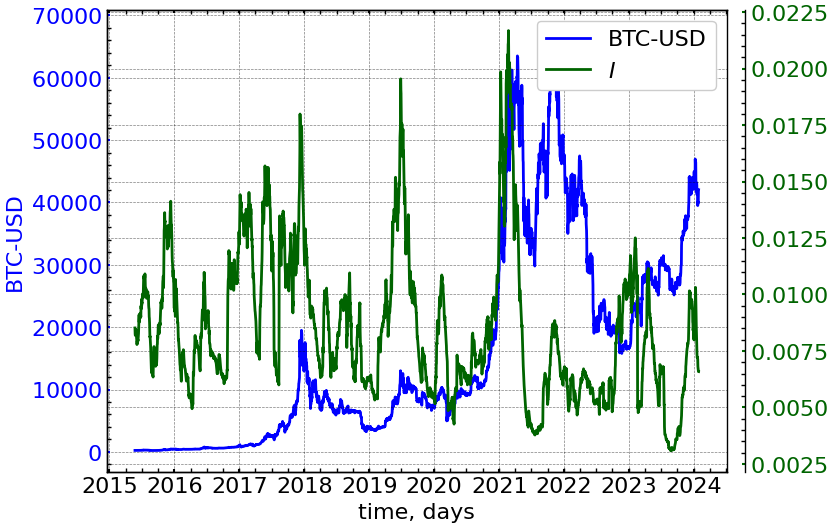

In [72]:
plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          indicators[3], 
          ylabel, 
          measure_labels[3],
          xlabel,
          file_names[3],
          clr="darkgreen")

##### Максимальний ступінь посередництва

Іншою часто досліджуваною характеристикою вершин на основі шляхів є **ступінь посередництва**, яка вимірює частку всіх найкоротших шляхів у мережі, що проходять від $i$ до $j$ через вершину $k$. Для загальної кількості найкоротших шляхів між вершинами $i$ та $j$, позначених як $\sigma(i,j)$, та найкоротших шляхів, що проходять через дану вершину $k(\sigma(i, j | k))$, ступінь посередництва можна визначити як

$$
b_k = \sum_{i,j=1; i,j \neq k}^{N} \frac{\sigma(i, j | k)}{\sigma(i, j)}. 
$$ {#eq-14-22}

Щоб віднайти найбільшу кількість інформації, що проходить через конкретний $k$-й, ми вимірюємо максимальний ступінь посередництва, розглядаючи кожен $k$-ий вузол:

$$
B = \max_{i=1,...,N}b_{i}.
$$ {#eq-14-23}

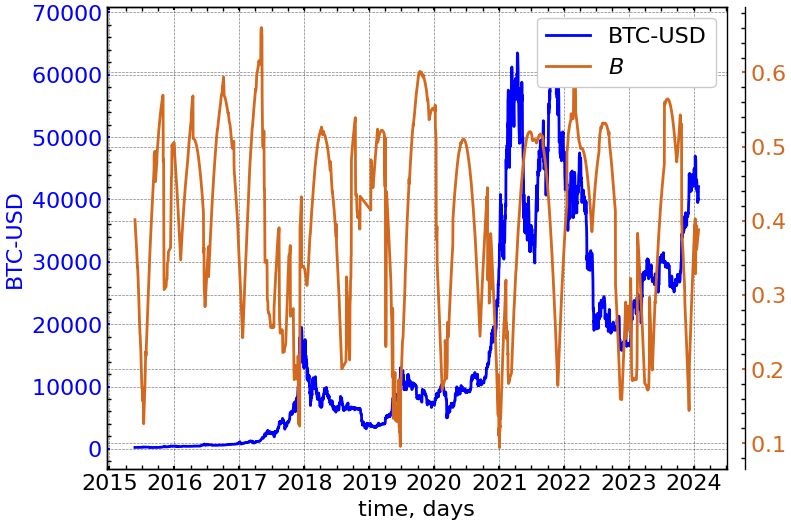

In [73]:
plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          indicators[4], 
          ylabel, 
          measure_labels[4],
          xlabel,
          file_names[4],
          clr="chocolate")

##### Середній ступінь гармонійності

Марчіорі та Латора [@PhysRevLett.87.198701] запропонували міру, подібну до (@eq-14-14), яка називається **ступенем гармонійності**. Для заданого вузла $j$ вона може бути визначена як

$$
Hc_{j} = \sum_{i=1, i \neq j}^{N} \left( l_{ij} \right)^{-1}, 
$$ {#eq-14-24}

де $(l_{ij})^{-1}=0$, якщо між вузлами $i$ та $j$ немає шляху. Середній ступінь гармонійності визначається через середнє арифметичне локальних ступенів гармонійності. 

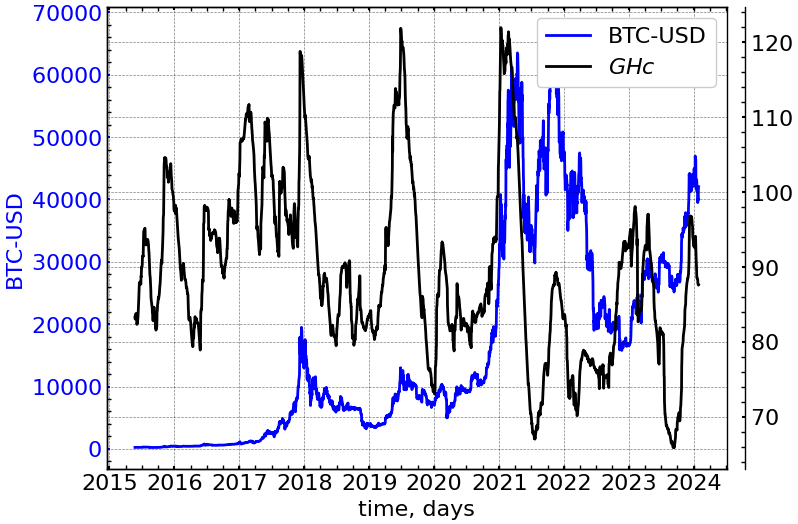

In [74]:
plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          indicators[5], 
          ylabel, 
          measure_labels[5],
          xlabel,
          file_names[5],
          clr="black")

#### Асортативність

In [85]:
Assortativity = []
AvgDegreeConnectivity = []

In [86]:
for i in tqdm(range(0,length-window,tstep)):
    # відбираємо фрагмент
    fragm = time_ser.iloc[i:i+window].copy()  

    # виконуємо процедуру трансформації ряду 
    fragm = transformation(fragm, ret_type)
    
    if graph_type == 'classic':
        g = NaturalVG(directed='left_to_right').build(fragm)
        pos = g.node_positions()
        nxg_dir = g.as_networkx()
    if graph_type == 'horizontal':
        g = HorizontalVG(directed='left_to_right').build(fragm)
        pos = g.node_positions()
        nxg_dir = g.as_networkx()
    
    # розрахунок асортативності
    assort = nx.degree_pearson_correlation_coefficient(nxg_dir)

    # середня степенева зв'язність
    avg_deg_con = np.mean(list(nx.average_degree_connectivity(nxg_dir, source="out", target="in").values()))

    Assortativity.append(assort)
    AvgDegreeConnectivity.append(avg_deg_con)

100%|██████████| 3170/3170 [00:30<00:00, 102.76it/s]


In [87]:
ind_names = ['Assortativity', 'AvgDegreeConnectivity']

indicators = [Assortativity, AvgDegreeConnectivity]

measure_labels = [r'$r$', r'$\langle d_{nn}^{w} \rangle$']

file_names = []

for i in range(len(ind_names)):
    name = f"{ind_names[i]}_symbol={symbol}_wind={window}_step={tstep}_seriestype={ret_type}_graph_type={graph_type}"
    np.savetxt(name + ".txt", indicators[i])
    file_names.append(name)

##### Середня степенева зв'язність

Середня степенева зв'язність $d_{nn}(d)$ для вершин зі ступенем $d$ є ще однією мірою, яка використовується для дослідження структури мереж [@PhysRevLett.87.258701]. Оскільки вона може бути виражена як $d_{nn}(d) = \sum_{d'}d^{'}P(d^{'}|d)$, де $P(d^{'}| 𝑑)$ --- умовна ймовірність того, що дана вершина зі ступенем $d$ пов'язана з вершиною зі ступенем $d^{'}$. Ця величина виражає кореляцію між степенями зв'язаних вершин [@protein_net]. За відсутності кореляцій між степенями, $𝑃(𝑑^{'}| 𝑑)$ не залежить від $𝑑$, а також від середнього степеня найближчих сусідів, тобто $d_{nn}(𝑑)=\text{const}$ [@PhysRevLett.87.258701]. За наявності кореляцій поведінка $d_{nn}(d)$ визначає два загальні класи мереж. Якщо $d_{nn}(d)$ є зростаючою функцією від $d$, тоді вершини з високим (низьким) ступенем мають більшу ймовірність бути пов'язаними з вершинами з вищим (нижчим) ступенем. Ця властивість у різних галузях науки називається *асортативним змішуванням* [@PhysRevLett.89.208701]. Навпаки, спадна поведінка $d_{nn}(d)$ визначає *дизасортативне змішування*, в тому сенсі, що вершини з високим (низьким) степенем мають більшість сусідів з низьким (високим) степенем вершин.

Міру такої сортативності чи дизасортативності для сусідів певної вершини $i$ можна визначити як **середню степеневу зв'язність** (середньозважений ступінь найближчого сусіда):

$$
d_{i}^{w} = \frac{1}{s_i}\sum_{j=1}^{N}A_{ij}w_{ij}d_{j},
$$ {#eq-14-25}

де $s_i = \sum_{j=1}^{N}A_{ij}w_{ij}$ --- це "сила" $i$-го вузла; $A_{ij}$ --- це елемент матриці суміжності $A$; $w_{ij}$ --- це вага ребра $e_{ij}$ (у нашому випадку вона дорівнює 1); $d_j$ представляє ступінь вершини $j$-го сусіда. 

Загалом, це рівняння вимірює ступінь тяжіння сусідів з високим або низьким ступенем вершини один до одного відносно величини фактичних взаємодій.

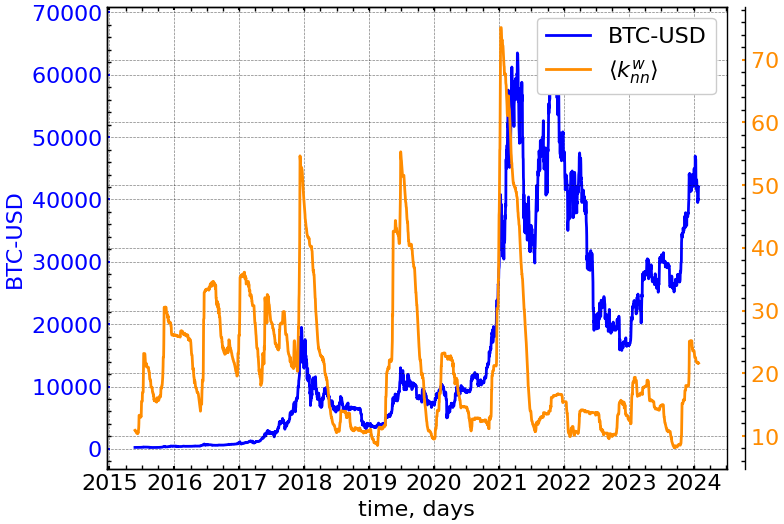

In [89]:
plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          indicators[1], 
          ylabel, 
          measure_labels[1],
          xlabel,
          file_names[1],
          clr="darkorange")

##### Ступінь асортативності

Інша форма асортативного змішування залежить від однієї або декількох скалярних властивостей вершин мережі. Для його обчислення ми визначаємо матрицю $e_{ij}$, яка задовольняє правилам додавання: $\sum_{ij}e_{ij}=1$, $\sum_{j}e_{ij}=a_i$, $\sum_{i}e_{ij}=b_j$, де $a_i$ та $b_j$ --- частки ребер, які починаються та закінчуються у вершинах $i$ та $j$. Розрахувавши коефіцієнт кореляції Пірсона, можна визначити ступінь асортативності [@PhysRevLett.89.208701]. Таким чином, цей коефіцієнт асортативності обчислюється як

$$
r = \frac{\sum_{xy}xy(e_{xy} - a_{x}b_{y})}{\sigma_{a}\sigma_{b}},
$$ {#eq-14-26}

де $\sigma_{a}$ та $\sigma_{b}$ визначають стандартні відхилення розподілів $a_x$ та $b_y$; $-1 \leq r \leq 1$, де $r<0$ вказує на вищу дизасортативність, $r>0$ демонструє вищу асортативність, а $r=0$ говорить про відсутність асортативності між вершинами.

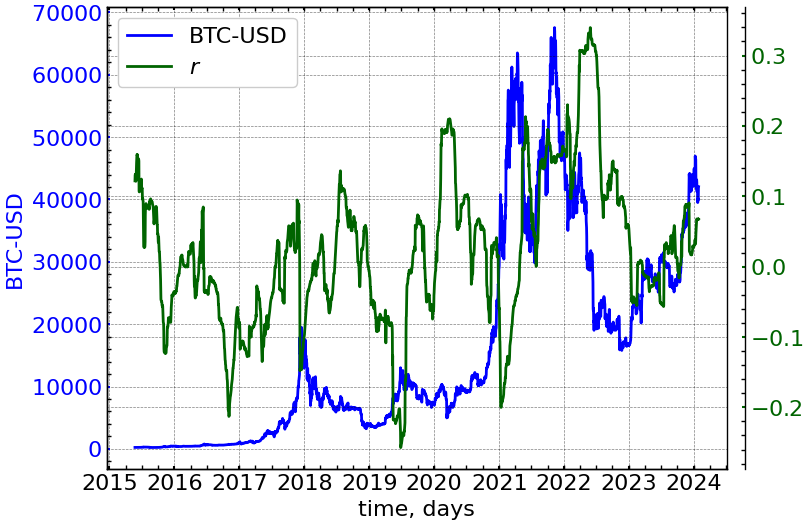

In [88]:
plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          indicators[0], 
          ylabel, 
          measure_labels[0],
          xlabel,
          file_names[0],
          clr="darkgreen")

#### Кластеризація

In [79]:
Transitivity = []
AvgClustering = []
AvgSquareClustering = []

In [80]:
for i in tqdm(range(0,length-window,tstep)):
    # відбираємо фрагмент
    fragm = time_ser.iloc[i:i+window].copy()  

    # виконуємо процедуру трансформації ряду 
    fragm = transformation(fragm, ret_type)
    
    if graph_type == 'classic':
        g = NaturalVG(directed=None).build(fragm)
        pos = g.node_positions()
        nxg = g.as_networkx()
    if graph_type == 'horizontal':
        g = HorizontalVG(directed=None).build(fragm)
        pos = g.node_positions()
        nxg = g.as_networkx()

    # транзитивність
    trans = nx.transitivity(nxg)

    # глобальний коефіцієнт кластеризації
    avg_clust = nx.average_clustering(nxg)

    # коефіцієнт квадратичної кластеризації 
    avg_sqr_clust = np.mean(list(nx.square_clustering(nxg).values()))
    
    Transitivity.append(trans)
    AvgClustering.append(avg_clust)
    AvgSquareClustering.append(avg_sqr_clust)

100%|██████████| 3170/3170 [18:11<00:00,  2.90it/s]


In [81]:
ind_names = ['AvgClustering', 'Transitivity', 'AvgSquareClustering']

indicators = [AvgClustering, Transitivity, AvgSquareClustering]

measure_labels = [r'$\langle C_3 \rangle$', r'$T$', r'$\langle C_4 \rangle$']

file_names = []

for i in range(len(ind_names)):
    name = f"{ind_names[i]}_symbol={symbol}_wind={window}_step={tstep}_seriestype={ret_type}_graph_type={graph_type}"
    np.savetxt(name + ".txt", indicators[i])
    file_names.append(name)

##### Коефіцієнт глобальної кластеризації

Для того, щоб охарактеризувати щільність зв'язків між сусідами вершини $i$, ми можемо використати коефіцієнт локальної кластеризації:

$$
C_{i}^{3} = \frac{\sum_{k,j=1}^{N}A_{ik}A_{kj}A_{ji}}{d_i(d_i - 1)},
$$ {#eq-14-26}

де чисельник позначає кількість закритих трикутників, що містять вершину $i$.

Ми можемо розглядати **глобальний коефіцієнт кластеризації**, як середнє арифметичне локального коефіцієнта кластеризації трикутників [@watts1998collective]:

$$
C^{3} = \frac{1}{N}\sum_{i=1}^{N}C_{i}^{3},
$$ {#eq-14-27}

що вимірює середню схильність системи до утворення трикутних кластерів.

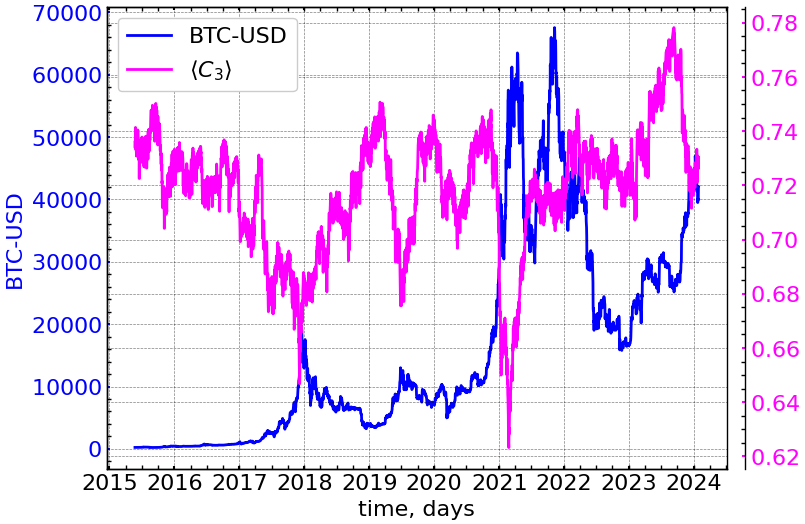

In [82]:
plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          indicators[0], 
          ylabel, 
          measure_labels[0],
          xlabel,
          file_names[0],
          clr="magenta")

##### Транзитивність

У випадку дуже неоднорідних степенів, тобто безмасштабних мереж, де лише кілька вершин мають високу степінь, а інші --- низьку ($d_i < 2$), вершини з низькою степенню будуть брати участь переважно в обчисленні локального коефіцієнта кластеризації, що може призвести до недооцінки трикутних кластерів у мережі. Баррат і Вайгт [@barrat2000properties] запропонували альтернативний підхід для подолання такої проблеми, який отримав назву **транзитивності** [@BOCCALETTI2006175]:

$$
T = \frac{\sum_{k,j=1}^{N}A_{ik}A_{kj}A_{ji}}{\sum_{i,k,j=1}^{N}A_{ik}A_{ji}}.
$$ {#eq-14-28}

У реальних мережах ми можемо зіткнутися з випадками, коли зв'язані сусіди в мережі можуть утворювати різні кліки (форми кластеризації). Класичний коефіцієнт локальної кластеризації, який вимірює ймовірність знаходження трикутників, зазвичай відповідає одностороннім мережам. Однак він не може бути сформований у двосторонніх мережах [@HOLME2004155;@PhysRevE.68.056107]. Складні структури односторонніх, двосторонніх і багатосторонніх мереж реальної системи можуть призвести до утворення кластерів набагато вищого порядку.

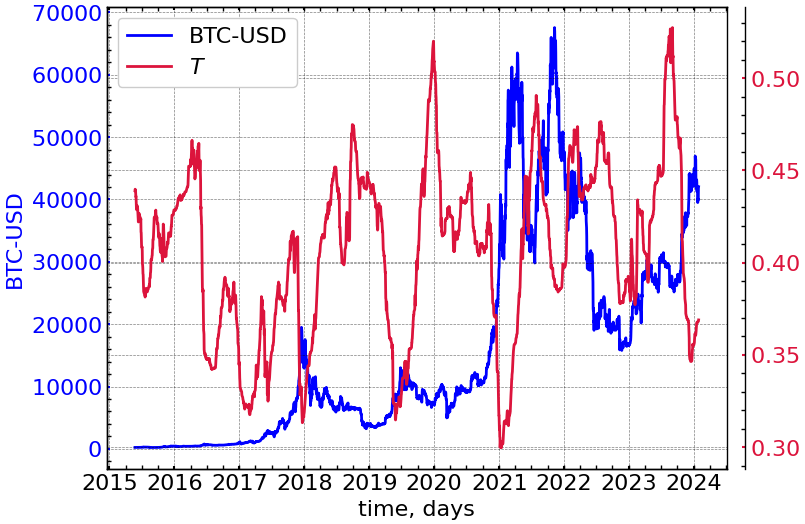

In [83]:
plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          indicators[1], 
          ylabel, 
          measure_labels[1],
          xlabel,
          file_names[1],
          clr="crimson")

##### Коефіцієнт квадратичної кластеризації

Подібно до $C_{i}^{3}$, який є класичним коефіцієнтом локальної кластеризації, було запропоновано кількісно оцінити коефіцієнт кластеризації $C_{i}^{4}$ [@PhysRevE.72.056127], який відповідає ймовірності знайти "квадратний" кластер, утворений сусідами вузла $i$. Тобто, що два сусіди вузла $i$ мають спільного сусіда, відмінного від $i$. Для кожної вершини $i$ вона може бути обчислена як

$$
C_{i}^{4} = \frac{\sum_{k=1}^{d_i}\sum_{j=k+1}^{d_i}q_i(k, j)}{\sum_{k=1}^{d_i}\sum_{j=k+1}^{d_i}[a_{i}(k, j) + q_i(k, j)]},
$$ {#eq-14-29}

де $q_i(k, j)$ представляє кількість спостережуваних квадратних кластерів; $a_i(k, j) = \left( d_k - (1+q_{i}(k, j) + \theta_{ki}) \right) + \left( d_{j} - (1 + q_{i}(k, j) + \theta_{kj}) \right)$; $\theta_{kj}=1$ якщо $k$ і $j$ є зв'язними і 0 у зворотньому випадку [@ZHANG20086869]. Схожим чином до рівняння (@eq-14-27), ми можемо визначити **глобальний коефіцієнт квадратичної кластеризації** як 

$$
C^{4} = \frac{1}{N}\sum_{i=1}^{N}C_{i}^{4}. 
$$ {#eq-14-30}


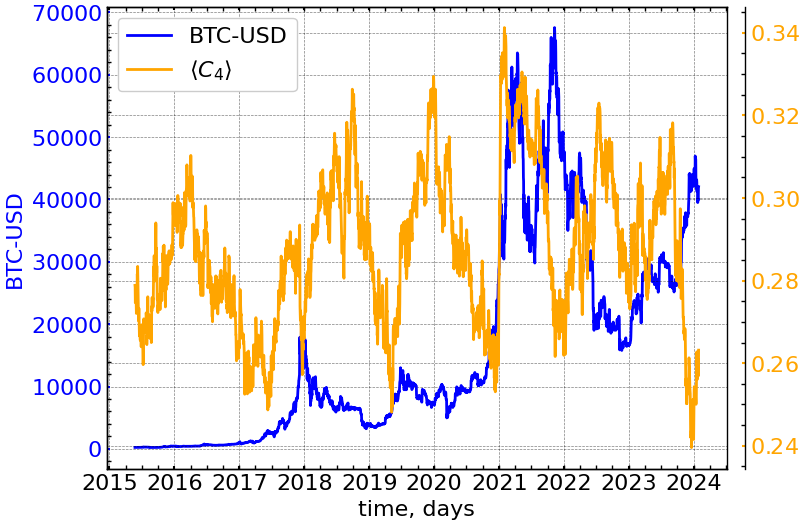

In [84]:
plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          indicators[2], 
          ylabel, 
          measure_labels[2],
          xlabel,
          file_names[2],
          clr="orange")

#### Зв'язність 

In [90]:
Density = []

In [91]:
for i in tqdm(range(0,length-window,tstep)):
    # відбираємо фрагмент
    fragm = time_ser.iloc[i:i+window].copy()  

    # виконуємо процедуру трансформації ряду 
    fragm = transformation(fragm, ret_type)
    
    if graph_type == 'classic':
        g = NaturalVG(directed=None).build(fragm)
        pos = g.node_positions()
        nxg = g.as_networkx()
    if graph_type == 'horizontal':
        g = HorizontalVG(directed=None).build(fragm)
        pos = g.node_positions()
        nxg = g.as_networkx()
    
    # розрахунок щільності
    dens = nx.density(nxg)

    Density.append(dens)

100%|██████████| 3170/3170 [00:09<00:00, 322.00it/s]


In [92]:
ind_names = ['Density']

indicators = [Density]

measure_labels = [r'$\rho$']

file_names = []

for i in range(len(ind_names)):
    name = f"{ind_names[i]}_symbol={symbol}_wind={window}_step={tstep}_seriestype={ret_type}_graph_type={graph_type}"
    np.savetxt(name + ".txt", indicators[i])
    file_names.append(name)

##### Щільність

Щільність графа може допомогти визначити, наскільки густо заселений різними ребрами представлений граф. Чим вона вища, тим більшою є зв'язність досліджуваного графа. Її можна обчислити як 

$$
\rho = \frac{E}{E_{max}}, 
$$ {#eq-14-31}

де $E$ дорівнює кількості ребер у $G$, а $E_{max}=N(N-1)/2$ --- це максимальна кількість ребер у простому ненаправленому графі. 

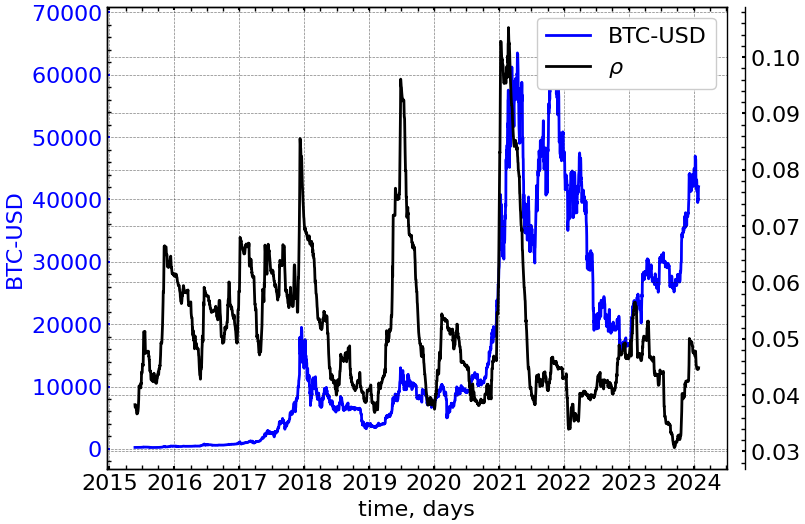

In [93]:
plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          indicators[0], 
          ylabel, 
          measure_labels[0],
          xlabel,
          file_names[0],
          clr="black")

#### Міри відстані

In [94]:
Diameter = []
Radius = []

In [95]:
for i in tqdm(range(0,length-window,tstep)):
    # відбираємо фрагмент
    fragm = time_ser.iloc[i:i+window].copy()  

    # виконуємо процедуру трансформації ряду 
    fragm = transformation(fragm, ret_type)
    
    if graph_type == 'classic':
        g = NaturalVG(directed=None).build(fragm)
        pos = g.node_positions()
        nxg = g.as_networkx()
    if graph_type == 'horizontal':
        g = HorizontalVG(directed=None).build(fragm)
        pos = g.node_positions()
        nxg = g.as_networkx()
    
    # розрахунок діаметра
    diameter = nx.diameter(nxg)
    
    # розрахунок радіуса
    rad = nx.radius(nxg)
    
    Diameter.append(diameter)
    Radius.append(rad)

100%|██████████| 3170/3170 [05:57<00:00,  8.88it/s]


In [104]:
ind_names = ['Diameter', 'Radius']

indicators = [Diameter, Radius]

measure_labels = [r'$diam$', r'rad']

file_names = []

for i in range(len(ind_names)):
    name = f"{ind_names[i]}_symbol={symbol}_wind={window}_step={tstep}_seriestype={ret_type}_graph_type={graph_type}"
    np.savetxt(name + ".txt", indicators[i])
    file_names.append(name)

##### Діаметр

Зауважимо, що найкоротший шлях, який є характеристикою відстані між досліджуваними вершинами $i$ та $j$, може бути використаний для характеристики загального розміру мережі. Величина, яка визначає найбільшу відстань між вершиною $i$ та будь-якою іншою вершиною, називається **ексцентриситетом**:

$$
\varepsilon(i) = \max_{j}l_{ij}.
$$ {#eq-14-32}

Розмір мережі можна охарактеризувати в термінах **діаметру**, який можна визначити як

$$
diam = \max_{i}\varepsilon(i) = \max_{i}\max_{j}l_{ij}.
$$ {#eq-14-33}


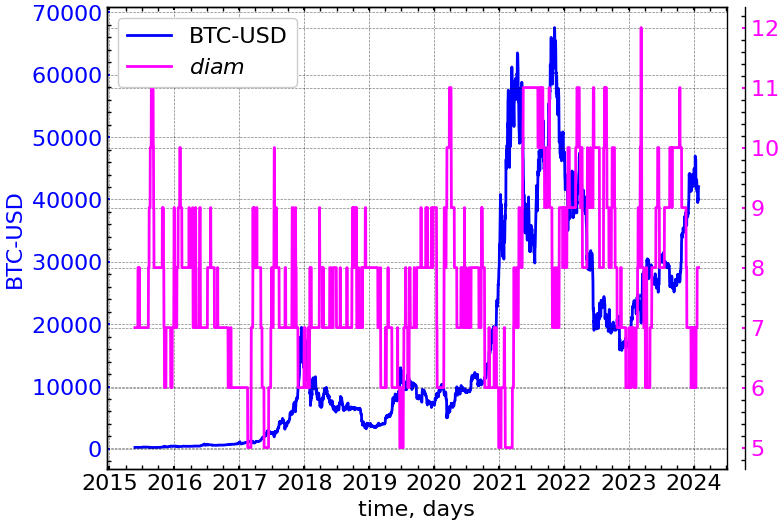

In [105]:
plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          indicators[0], 
          ylabel, 
          measure_labels[0],
          xlabel,
          file_names[0],
          clr="magenta")

##### Радіус

Таким чином, діаметр --- це найбільша (максимальна) довжина шляху в мережі. Отже, ми можемо визначити найменший ексцентриситет досліджуваної мережі, який називається **радіусом**:

$$
rad = \min_{i}\varepsilon(i) = \min_{i}\max_{j}l_{ij}.
$$ {#eq-14-34}

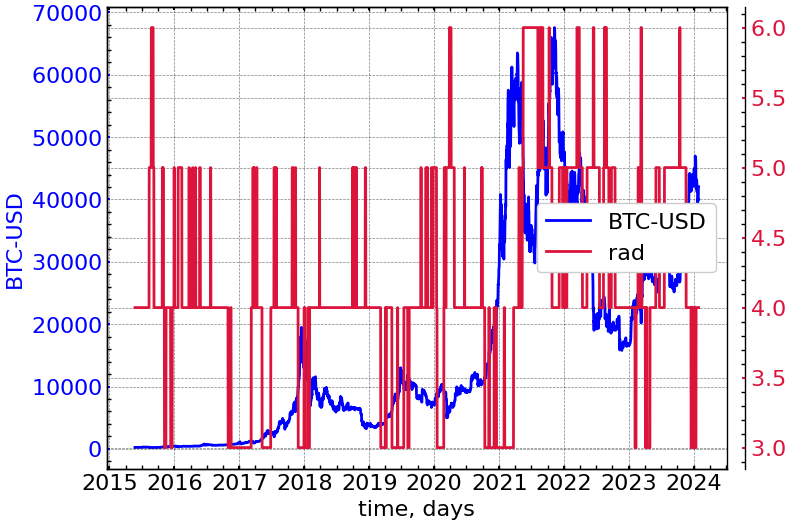

In [106]:
plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          indicators[1], 
          ylabel, 
          measure_labels[1],
          xlabel,
          file_names[1],
          clr="crimson")

#### Ефективність

In [99]:
LocalEfficiency = []
GlobalEfficiency = []

In [100]:
for i in tqdm(range(0,length-window,tstep)):
    # відбираємо фрагмент
    fragm = time_ser.iloc[i:i+window].copy()  

    # виконуємо процедуру трансформації ряду 
    fragm = transformation(fragm, ret_type)
    
    if graph_type == 'classic':
        g = NaturalVG(directed=None).build(fragm)
        pos = g.node_positions()
        nxg = g.as_networkx()
    if graph_type == 'horizontal':
        g = HorizontalVG(directed=None).build(fragm)
        pos = g.node_positions()
        nxg = g.as_networkx()
    
    # розрахунок локальної ефективності
    local_eff = nx.local_efficiency(nxg)

    # розрахунок глобальної ефективності
    glob_eff = nx.global_efficiency(nxg)
    
    LocalEfficiency.append(local_eff)
    GlobalEfficiency.append(glob_eff)

100%|██████████| 3170/3170 [38:39<00:00,  1.37it/s]  


In [107]:
ind_names = ['LocalEfficiency', 'GlobalEfficiency']

indicators = [LocalEfficiency, GlobalEfficiency]

measure_labels = [r'$E_{loc}$', r'$E_{glob}$']

file_names = []

for i in range(len(ind_names)):
    name = f"{ind_names[i]}_symbol={symbol}_wind={window}_step={tstep}_seriestype={ret_type}_graph_type={graph_type}"
    np.savetxt(name + ".txt", indicators[i])
    file_names.append(name)

##### Глобальна ефективність

Визначення поведінки в малому світі згідно з Латором та Марчіорі [@PhysRevLett.87.198701] можна подати в термінах ефективності $E$ мережі. Ефективність $\varepsilon_{ij}$ між вершинами $i$ та $j$ визначається як $1/l_{ij}$. Коли $l_{ij}=\infty$ і, послідовно, якщо $1/l_{ij}=0$, $i$ і $j$ вважаються роз'єднаними. Відповідно до формалізму ефективності, вона може бути кількісно визначена як для глобальних, так і для локальних масштабів $G$. Латора та Марчіорі підкреслювали, що $1/L$ та $C$ можна розглядати як перші наближення глобальної ($E_{glob}$) та локальної ($E_{loc}$) ефективності.

Середню (глобальну) ефективність $G$ можна визначити як

$$
E_{glob} = \frac{1}{N(N-1)}\sum_{i,j=1}\left( l_{ij} \right)^{-1}.
$$ {#eq-14-35}

Для найбільш ефективного графа, де інформація поширюється найбільш ефективно, $E_{glob}$ набуває максимального значення, а в іншому випадку --- мінімального.

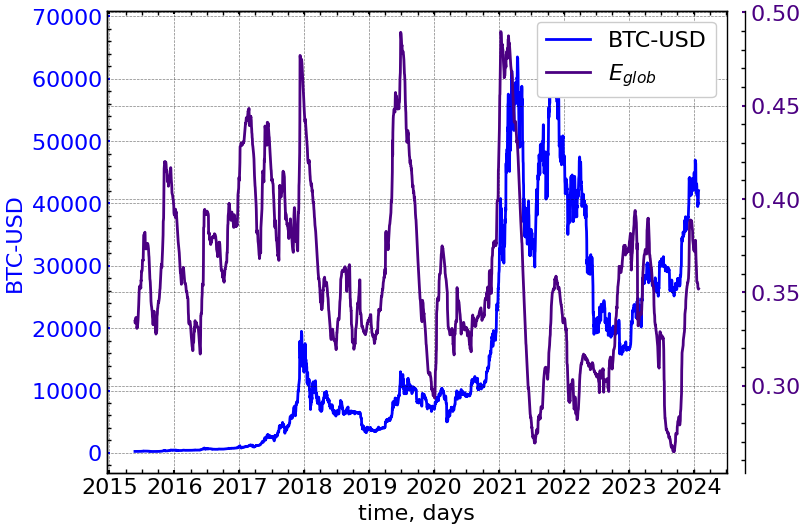

In [109]:
plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          indicators[1], 
          ylabel, 
          measure_labels[1],
          xlabel,
          file_names[1],
          clr="indigo")

##### Локальна ефективність

Локальна ефективність відіграє роль, подібну до глобального коефіцієнта кластеризації. Локальна ефективність $E_{loc}$ може бути кількісно визначена як

$$
E_{loc} = \frac{1}{N}\sum_{i \in G_i}E_{glob}(G_i),
$$ {#eq-14-36}

де $G_i$ --- локальний підграф $G$, а $E_{glob}(G_i)$ характеризує ефективність цього конкретного підграфа. Подібно до глобального коефіцієнта кластеризації, $E_{loc}$ визначає, наскільки відмовостійкою є досліджувана система, тобто наскільки ефективним є транспортування інформації між першими сусідами $i$-го вузла при його видаленні.

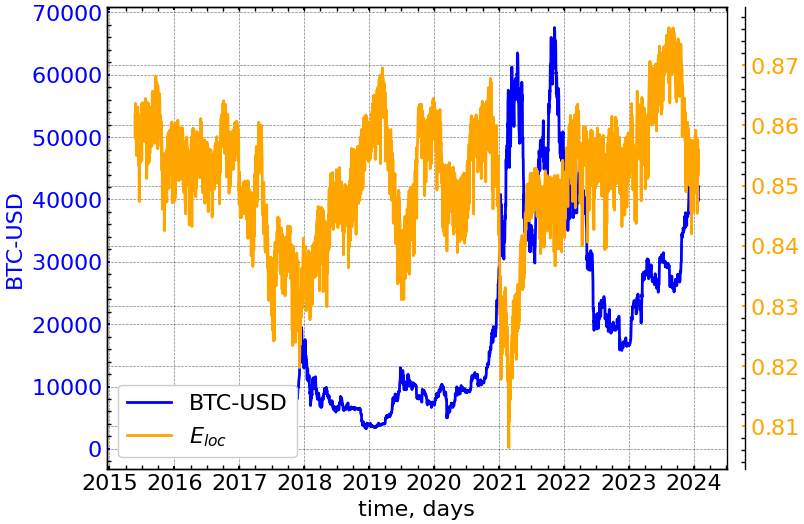

In [108]:
plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          indicators[0], 
          ylabel, 
          measure_labels[0],
          xlabel,
          file_names[0],
          clr="orange")

#### Найкоротший шлях

In [110]:
AvgPathLength = []

In [111]:
for i in tqdm(range(0,length-window,tstep)):
    # відбираємо фрагмент
    fragm = time_ser.iloc[i:i+window].copy()  

    # виконуємо процедуру трансформації ряду 
    fragm = transformation(fragm, ret_type)
    
    if graph_type == 'classic':
        g = NaturalVG(directed=None).build(fragm)
        pos = g.node_positions()
        nxg = g.as_networkx()
    if graph_type == 'horizontal':
        g = HorizontalVG(directed=None).build(fragm)
        pos = g.node_positions()
        nxg = g.as_networkx()
    
    # розрахунок середньої довжини найкоротшого шляху
    avg_path_len = nx.average_shortest_path_length(nxg)
   
    AvgPathLength.append(avg_path_len)

100%|██████████| 3170/3170 [03:07<00:00, 16.94it/s]


In [112]:
ind_names = ['AvgPathLength']

indicators = [AvgPathLength]

measure_labels = [r'$ApLen$']

file_names = []

for i in range(len(ind_names)):
    name = f"{ind_names[i]}_symbol={symbol}_wind={window}_step={tstep}_seriestype={ret_type}_graph_type={graph_type}"
    np.savetxt(name + ".txt", indicators[i])
    file_names.append(name)

##### Середня довжина найкоротшого шляху

Звертаючи увагу на довжину найкоротшого шляху між двома вершинами $i$ та $j$, ми можемо визначити таку міру, як **середня довжина найкоротшого шляху**:

$$
ApLen = \frac{1}{N(N-1)}\sum_{i \neq j}l_{ij}. 
$$ {#eq-14-37}


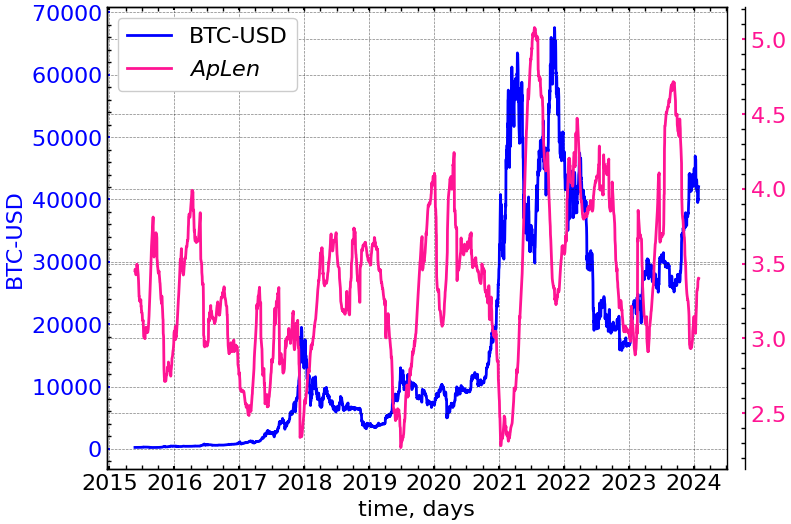

In [113]:
plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          indicators[0], 
          ylabel, 
          measure_labels[0],
          xlabel,
          file_names[0],
          clr="deeppink")